# Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Dataset

In [3]:
# Load dataset file
data = pd.read_csv('kc_house_data.csv', usecols=['price', 'sqft_living'])
data

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


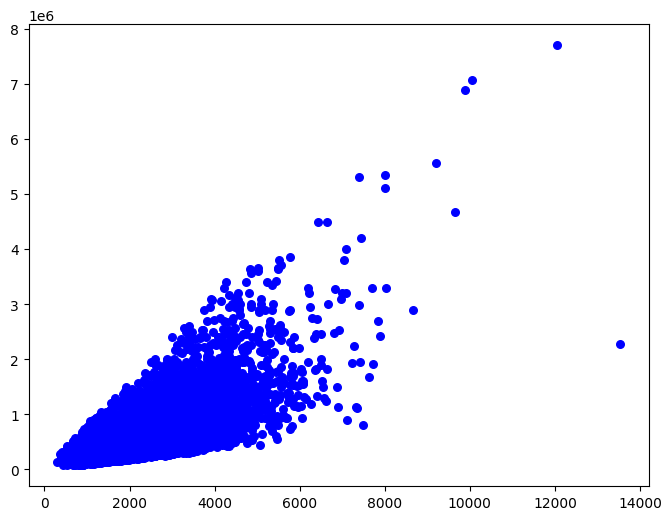

In [11]:
# Numpy 배열로 전환
data_np = np.array(data)

x = np.expand_dims(data_np[:, 1], 1)          # sqft_living / data의 모든행과 두번째열
y = data_np[:, 0]          # price            / 모든행과 첫번째 열

# Dataset 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y, color='b', marker='o', s=30)
plt.show()

In [5]:
x.shape

(21613, 1)

In [6]:
# Dataset 정규화
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

x = (x-x_mean)/x_std
y = (y-y_mean)/y_std

# Train dataset / Test dataset 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

## Model


In [7]:
class LinearRegression():
    def __init__(self, learning_rate=0.001, n_iters=1000):
        # init
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weight = None
        self.bias = None

    def fit(self, x, y):
        # Init weight
        self.weight = np.zeros(1)
        self.bias = 0

        n_samples, _ = x.shape

        # Learning
        for i in range(self.n_iters):
          y_pred = np.dot(x, self.weight) + self.bias

          dw = (1/n_samples) * np.sum(np.dot((y_pred-y), x))
          db = (1/n_samples) * np.sum((y_pred-y))

          # Update weights
          self.weight = self.weight - self.lr * dw
          self.bias = self.bias - self.lr * db

    def predict(self, x):
      # Prediction
      y_pred = np.dot(x, self.weight) + self.bias

      return y_pred



## Prediction

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# loss
loss = np.sum((y_test - y_pred)**2)/len(y_test)
print(loss)

0.5583519672801036


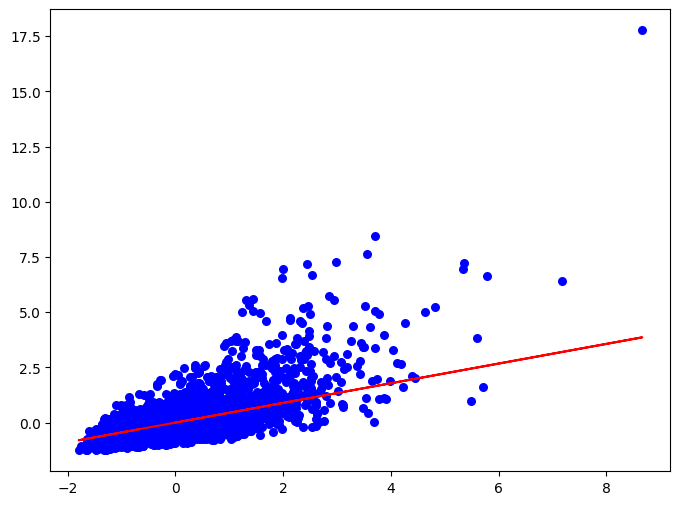

In [29]:
# Visualization
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.plot(x_test, y_pred, 'r')
plt.show()

In [6]:
print(model.weight)
print(model.bias)

NameError: name 'model' is not defined

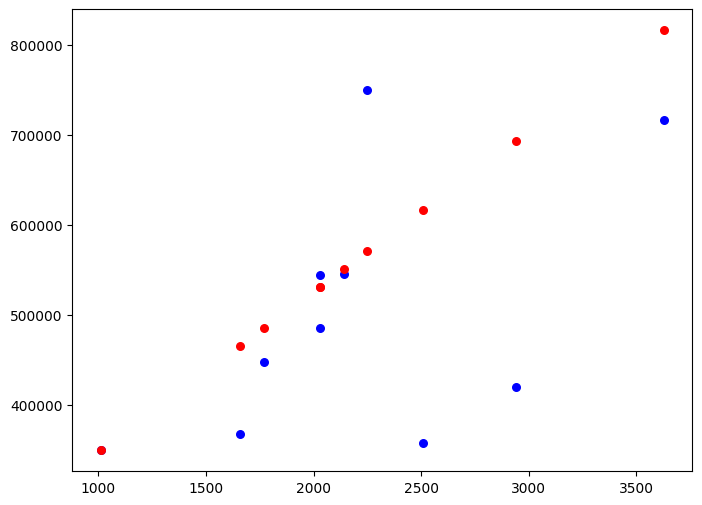

In [32]:
# sampling data
x_sampling = x_test[:10]
y_sampling = y_test[:10]

y_pred = model.predict(x_sampling)

# inverse normalization
x_sampling = (x_sampling * x_std) + x_mean
y_sampling = (y_sampling * y_std) + y_mean
y_pred = (y_pred * y_std)+y_mean

fig = plt.figure(figsize=(8,6))
plt.scatter(x_sampling, y_sampling, color='b', marker='o', s=30)
plt.scatter(x_sampling, y_pred, color='r', marker='o', s=30)
plt.show()

# Mutiple Linear Regression

## Dataset

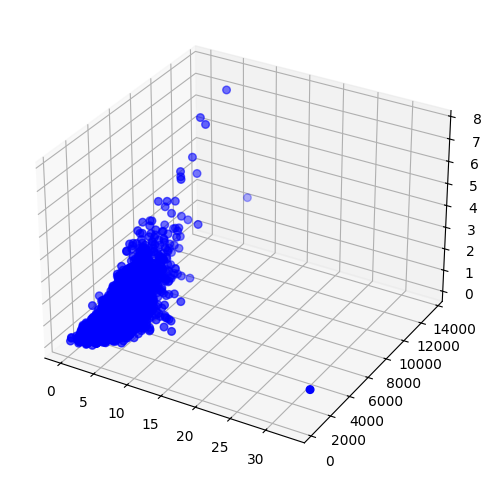

In [18]:
# Load dataset file
data = pd.read_csv('kc_house_data.csv', usecols=['price', 'bedrooms', 'sqft_living'])

# Numpy 배열로 전환
data_np = np.array(data).astype(np.float64)

x = data_np[:, 1:]      # bedrooms, sqft_living
y = data_np[:, 0]       # price

# Dataset 시각화
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, color='b', marker='o', s=30)
plt.show()

In [41]:
# Normalization
x[:, 0] = (x[:, 0]-np.mean(x[:, 0]))/np.std(x[:, 0])
x[:, 1] = (x[:, 1]-np.mean(x[:, 1]))/np.std(x[:, 1])
y = (y-np.mean(y))/np.std(y)


# Train dataset / Test dataset 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

## Model

In [42]:
class LinearRegression():
    def __init__(self):
        # init
        # self.lr = learning_rate
        # self.n_iters = n_iters
        # self.weight = None
        # self.bias = None
        self.theta=None

    def fit(self, x, y):
        # Init weight
        # self.weight = np.zeros(1)
        # self.bias = 0

        # n_samples, _ = x.shape

        # # Learning
        # for i in range(self.n_iters):
        #   y_pred = np.dot(x, self.weight) + self.bias

        #   dw = (1/n_samples) * np.sum(np.dot((y_pred-y), x))
        #   db = (1/n_samples) * np.sum((y_pred-y))

        #   # Update weights
        #   self.weight = self.weight - self.lr * dw
        #   self.bias = self.bias - self.lr * db
        n_samples,n_features =x.shape
        x=np.concatenate((x,np.expand_dims(np.ones(x.shape[0]),1)),1)
        self.theta=np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))

    def predict(self, x):
      # Prediction
       #y_pred = np.dot(x, self.weight) + self.bias
        x=np.concatenate((x,np.expand_dims(np.ones(x.shape[0]),1)),1)
        y=np.dot(x,self.theta)
        return y
        #Ordinary Least Squre Method
       
       



## Prediction

In [43]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# loss
loss = np.sum((y_test - y_pred)**2)/len(y_test)
print(loss)

0.48255599193439896


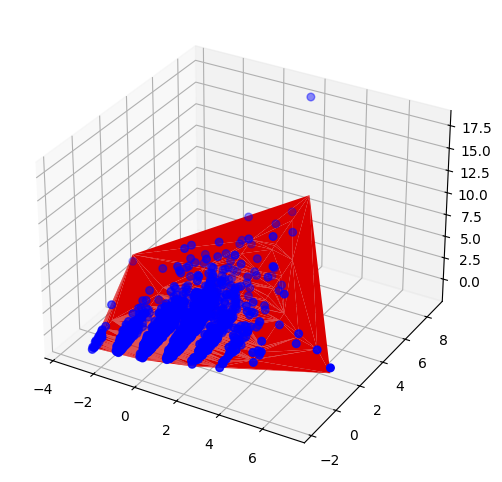

In [44]:
# Visualization
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, color='b', marker='o', s=30)
ax.plot_trisurf(x_test[:, 0], x_test[:, 1], y_pred, color='r')
plt.show()

In [39]:
print(model.weight)
print(model.bias)

[0.30637668 0.30637668]
0.00048289677569981977
